# Importing neccessary packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np, pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm 

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [3]:
%matplotlib inline

# Importing data-set

In [4]:
df = pd.read_csv('bank-marketing.csv')
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Performing Basic EDA

In [5]:
# Dimensions of Data-frame

df.shape

(45211, 19)

In [6]:
# Data types present in Data-frames

df.dtypes

age           int64
job          object
salary        int64
marital      object
education    object
targeted     object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object

In [7]:
# Overview of the Type and missing values present in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


> Data types are consistent and there are no missing values present, need to analyse 'unknown' categories.

# EDA

In [8]:
# Finding the categories (levels) present in each column (categorical ones)

for i in df.select_dtypes('object').columns:
    print(i, '\n')
    print(df[i].value_counts(normalize = True) * 100)
    print('\n\n')

job 

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64



marital 

married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64



education 

secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64



targeted 

yes    82.039769
no     17.960231
Name: targeted, dtype: float64



default 

no     98.197341
yes     1.802659
Name: default, dtype: float64



housing 

yes    55.583818
no     44.416182
Name: housing, dtype: float64



loan 

no     83.977351
yes    16.022649
Name: loan, dtype: float64



contact 

cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: cont

> Since poutcome has more than >50% of data as unknown it can be ignored as it won't aid in our analysis

In [9]:
# Checking dimension before dropping records

df.shape

(45211, 19)

In [10]:
df1 = df[~(df['pdays'] == -1)]
df1.shape

(8257, 19)

In [11]:
# Basic statistics post-dropping records for pdays

df1['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [12]:
# Confirming records were dropped

df.shape

(45211, 19)

In [13]:
# Basic statistics post-dropping records

df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- balance Negative
- pdays: -1 means not contacted
 > Also, 75% of data is -1 so practically a useless column 


## Visualization

## Uni-variant analysis

### Disribution of Numeric columns

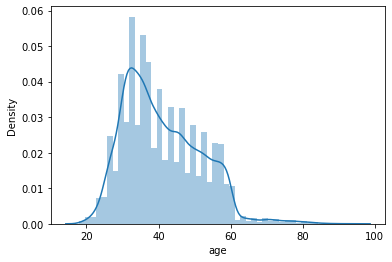

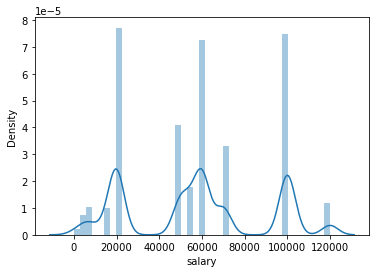

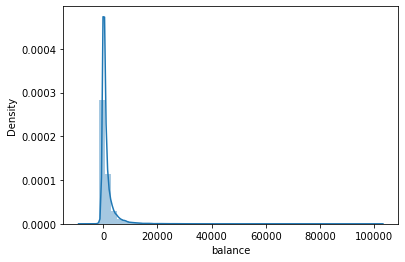

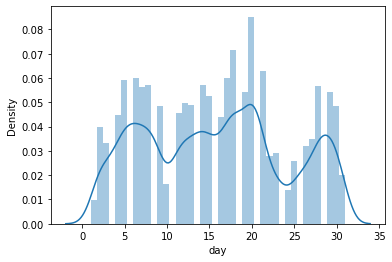

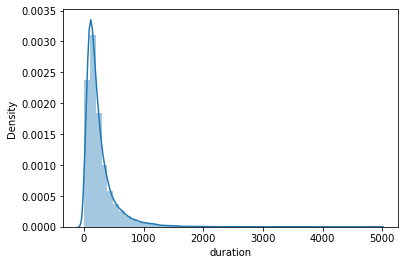

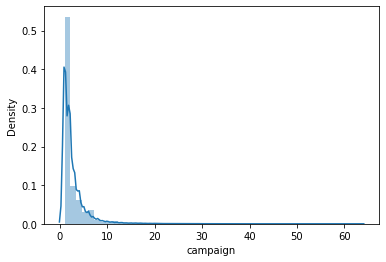

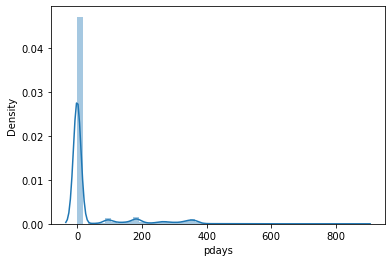

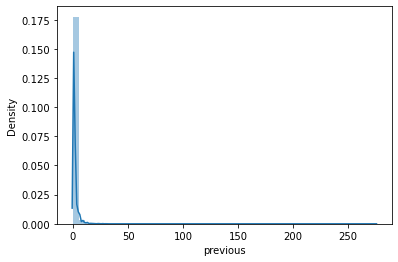

In [14]:
# Checking distribution for numeric columns

for i in df.select_dtypes('number'):
    sns.distplot(df[i])
    plt.show()

> No usual trends in data

### Checking distribution for categorical columns

In [15]:
df.select_dtypes('object').columns

Index(['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'response'],
      dtype='object')

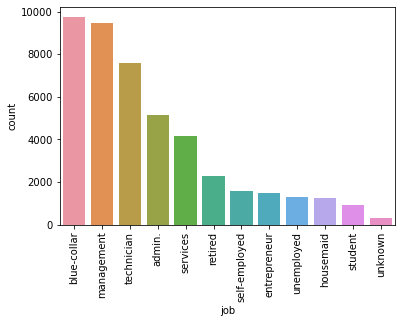

In [16]:
sns.countplot(x = 'job', data = df, order = df['job'].value_counts().index)

plt.xticks(rotation = 90)
plt.show()

In [17]:
df.loc[df['education'] == 'tertiary', ['job']].value_counts()

job          
management       7801
technician       1968
self-employed     833
entrepreneur      686
admin.            572
retired           366
unemployed        289
student           223
services          202
housemaid         173
blue-collar       149
unknown            39
dtype: int64

In [18]:
df.loc[df['education'] == 'secondary', ['job']].value_counts()

job          
blue-collar      5371
technician       5229
admin.           4219
services         3457
management       1121
retired           984
unemployed        728
self-employed     577
entrepreneur      542
student           508
housemaid         395
unknown            71
dtype: int64

> Tertiary less blue collared and entrepreneurs

<AxesSubplot:xlabel='marital', ylabel='count'>

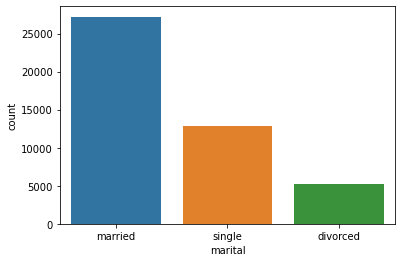

In [19]:
sns.countplot(x = 'marital', data = df)

> Highest to married approached

<AxesSubplot:xlabel='education', ylabel='count'>

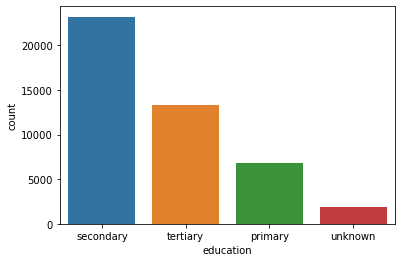

In [20]:
sns.countplot(x = 'education', data = df, order = df['education'].value_counts().index)

<AxesSubplot:xlabel='targeted', ylabel='count'>

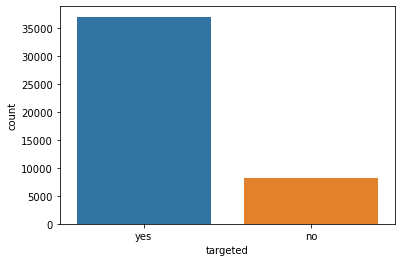

In [21]:
sns.countplot(x = 'targeted', data = df)

<AxesSubplot:xlabel='default', ylabel='count'>

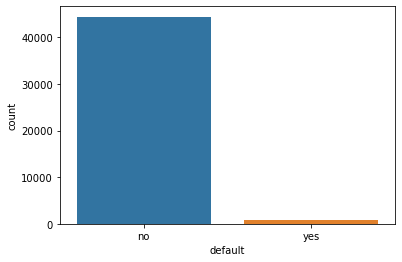

In [22]:
sns.countplot(x = 'default', data = df)

In [23]:
(df['default'].value_counts(normalize = True) * 100).round(2)

no     98.2
yes     1.8
Name: default, dtype: float64

> Every few people have defaulted, which shows that bank are targetting the right customers

<AxesSubplot:xlabel='housing', ylabel='count'>

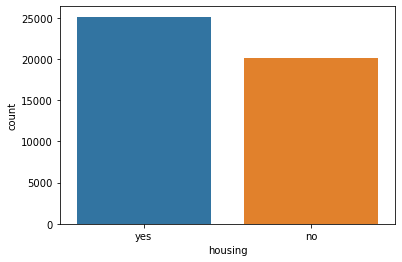

In [24]:
sns.countplot(x = 'housing', data = df)

> Good balance for with/wothout housing loans

<AxesSubplot:xlabel='loan', ylabel='count'>

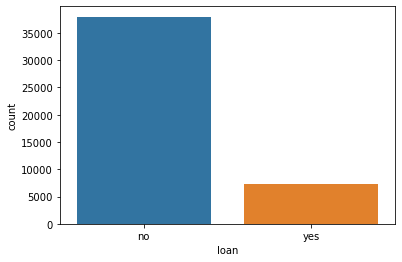

In [25]:
sns.countplot(x = 'loan', data = df)

> People with no loan history given loans

<AxesSubplot:xlabel='contact', ylabel='count'>

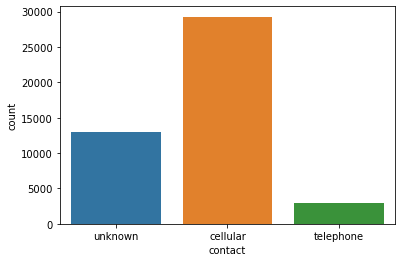

In [26]:
sns.countplot(x = 'contact', data = df)

> Company performs the highest comunication via cellular, needs to find other methods also to increase success ratio

<AxesSubplot:xlabel='month', ylabel='count'>

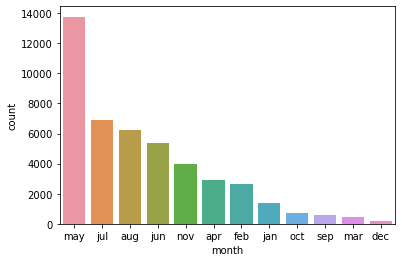

In [27]:
sns.countplot(x = 'month', data = df, order = df['month'].value_counts().index)

> Appraisal season tend to have highest loan takers

<AxesSubplot:xlabel='poutcome', ylabel='count'>

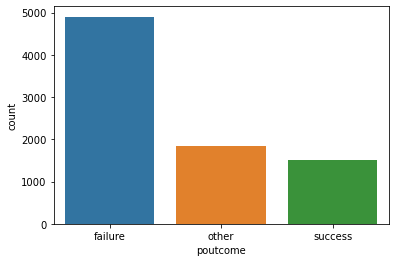

In [28]:
sns.countplot(x = 'poutcome', data = df[df['poutcome'] != 'unknown'])

> Many failure even during last campaign

> The data from last campaign doesn't seem to matter much

<AxesSubplot:xlabel='response', ylabel='count'>

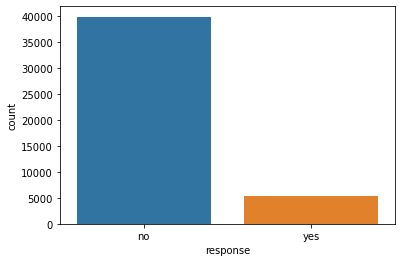

In [29]:
sns.countplot(x = 'response', data = df)

In [30]:
(df['response'].value_counts(normalize = True)*100).round(2)

no     88.3
yes    11.7
Name: response, dtype: float64

> Though the banks are tagetting the right customers, yet they're response rate is very low

### Outlier analysis

<AxesSubplot:xlabel='age'>

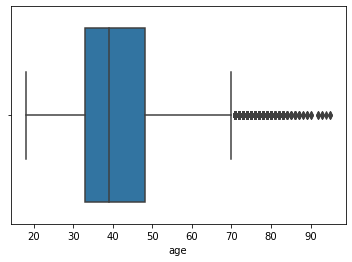

In [31]:
sns.boxplot('age', data = df)

> Majority of the customers lie between 33 - 48 age group<br><br>
> Also, there are coustomers in the post retirement age group, some of which comes out as outliers

<AxesSubplot:xlabel='salary'>

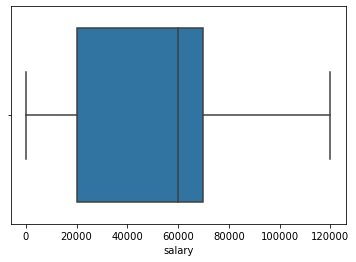

In [32]:
sns.boxplot('salary', data = df)

> No outliers present

<AxesSubplot:xlabel='balance'>

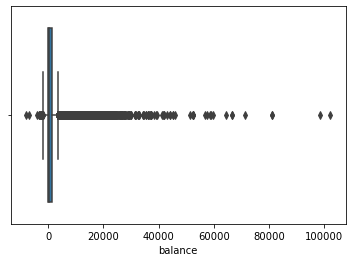

In [33]:
sns.boxplot('balance', data = df)

> Many customers targeted have <$5k in their account <br><br>
> Also, some customer have <0 as their balance (risky move, as they have higher defaulting chance) <br><br>
> There are many outliers in the column

<AxesSubplot:xlabel='campaign', ylabel='response'>

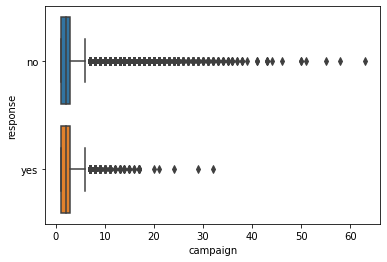

In [34]:
sns.boxplot(x = 'campaign', data = df, y = 'response')

> People whom the bank couldn't make as customers tend to have been contacted more times
- Which is obviously good that the bank is trying to loop in more customers (but failure ratio must be limited)

<AxesSubplot:xlabel='pdays', ylabel='response'>

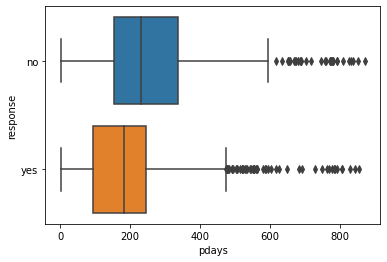

In [35]:
sns.boxplot(x = 'pdays', data = df[df['pdays'] != -1], y = 'response')

> People who became customer had been contacted on a frequent basis compared to latter.

## Bi-variant analysis

<AxesSubplot:xlabel='age'>

<Figure size 648x288 with 0 Axes>

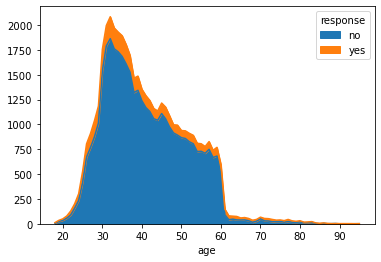

In [36]:
col = 'age'

plt.figure(figsize = (9, 4))

pd.crosstab(df[col], df['response']).plot(kind = 'area')


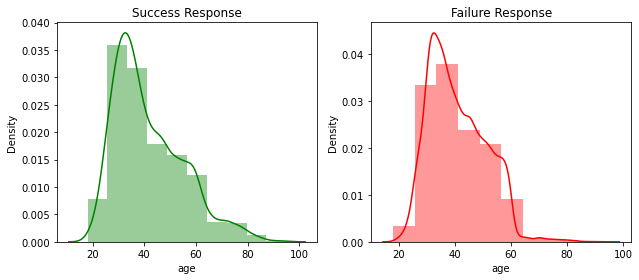

In [37]:
col = 'age'

plt.figure(figsize = (9, 4))

plt.subplot(1, 2, 1)
sns.distplot(df.loc[df['response'] == 'yes', col], color = 'g', bins = 10)
plt.title('Success Response')

plt.subplot(1, 2, 2)
sns.distplot(df.loc[df['response'] == 'no', col], color = 'r', bins = 10)
plt.title('Failure Response')

plt.tight_layout()

> Age group 22-32 tend to take more loans <br><br>
> Group 32 - 40 tend to reject loans

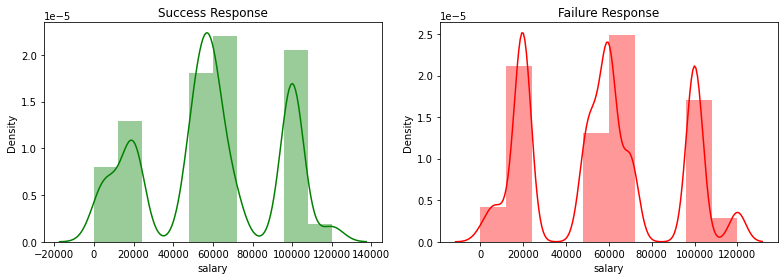

In [38]:
col = 'salary'

plt.figure(figsize = (11, 4))

plt.subplot(1, 2, 1)
sns.distplot(df.loc[df['response'] == 'yes', col], color = 'g', bins = 10)
plt.title('Success Response')

plt.subplot(1, 2, 2)
sns.distplot(df.loc[df['response'] == 'no', col], color = 'r', bins = 10)
plt.title('Failure Response')

plt.tight_layout()

> Salary bin 50000 - 60000 and 95000 - 110000 tend to take loans (higher success ratio)

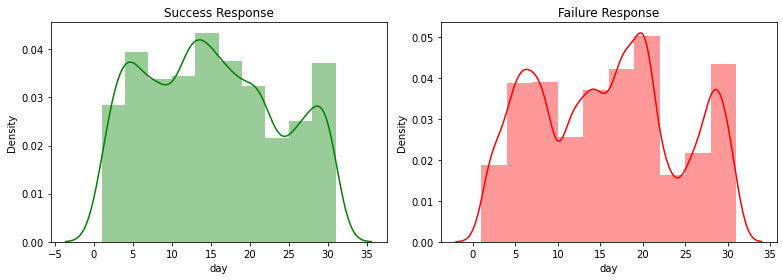

In [39]:
col = 'day'

plt.figure(figsize = (11, 4))

plt.subplot(1, 2, 1)
sns.distplot(df.loc[df['response'] == 'yes', col], color = 'g', bins = 10)
plt.title('Success Response')

plt.subplot(1, 2, 2)
sns.distplot(df.loc[df['response'] == 'no', col], color = 'r', bins = 10)
plt.title('Failure Response')

plt.tight_layout()

> More successful rates during starting and middle of month<br><br>
> From previous analysis we found that 19 of month had high calls, but more failure %

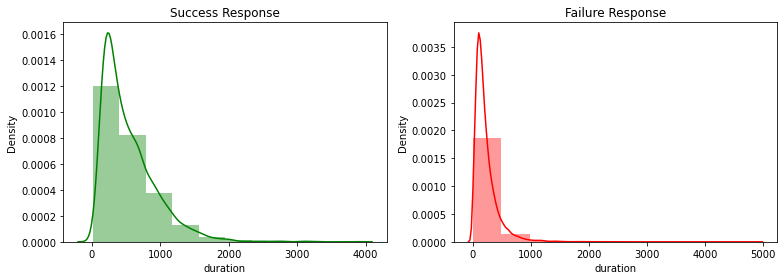

In [40]:
col = 'duration'

plt.figure(figsize = (11, 4))

plt.subplot(1, 2, 1)
sns.distplot(df.loc[df['response'] == 'yes', col], color = 'g', bins = 10)
plt.title('Success Response')

plt.subplot(1, 2, 2)
sns.distplot(df.loc[df['response'] == 'no', col], color = 'r', bins = 10)
plt.title('Failure Response')

plt.tight_layout()

> Success tends to be higher for duration >5000 seconds
- An inituition can be drwan that people reject the loans if not interested and drop off the call earlier whereas if they are interested tend to know more about the offerings and raises the duration time

In [41]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

<AxesSubplot:ylabel='education'>

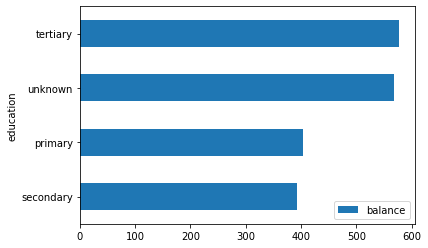

In [42]:
df.groupby('education').agg({'balance': 'median'}).sort_values(by = 'balance', ascending = True).plot(kind = 'barh')

> Highest median balance for tertiary educated people

<AxesSubplot:ylabel='education'>

<Figure size 648x288 with 0 Axes>

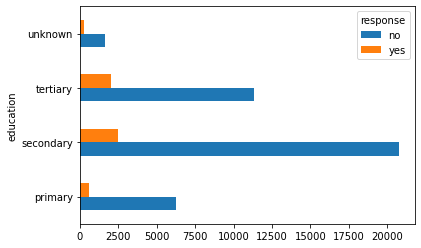

In [43]:
col = 'education'

plt.figure(figsize = (9, 4))

pd.crosstab(df[col], df['response']).plot(kind = 'barh')

> Highest reject is for secondary educated, as expected

In [44]:
df.select_dtypes('object').columns

Index(['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'response'],
      dtype='object')

<AxesSubplot:ylabel='job'>

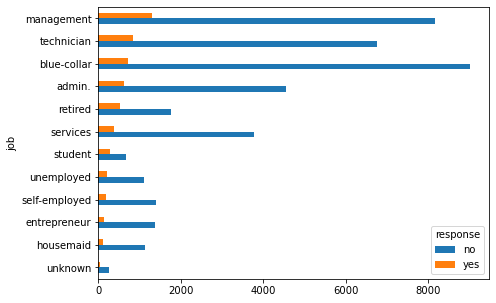

In [45]:
col = 'job'

pd.crosstab(df[col], df['response']).sort_values(by = 'yes', ascending = True).plot(kind = 'barh', figsize = (7, 5))

> Though blue-collared are approached (targetted) the highest, they have the highest rejection<br><br>
> The people who were approached (targetted) the second highest -- Management, has the highest response as 'yes' (almost twice as high as blue-collared

#### _We need to hot code target, to pairplot and heatmap analysis_

In [46]:
df['response'].value_counts()

no     39922
yes     5289
Name: response, dtype: int64

In [47]:
# Encoding Yes as 1 and No as 0

df['response'] = df['response'].map({'yes': 1, 'no': 0})

In [48]:
df['response'].value_counts()

0    39922
1     5289
Name: response, dtype: int64

<AxesSubplot:>

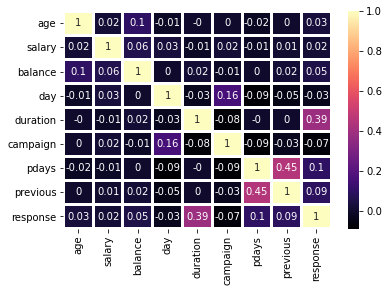

In [49]:
sns.heatmap(df.corr().round(2), cmap = 'magma', annot = True, linewidths = 2)

> pdays and previous have a positive corelation as expected but nearly no co-relation with the target

# Dummy Encoding

In [50]:
# Finding the columns to encode

df.select_dtypes('object').columns.to_list()

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [51]:
dummy_df = pd.get_dummies(df[df.select_dtypes('object').columns], drop_first = True)
dummy_df.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [52]:
df.shape

(45211, 19)

In [53]:
# Merging the 2 data-frames and removing the redundant columns

df = pd.concat([df.loc[:, ~df.columns.isin(df.select_dtypes('object').columns)], dummy_df], axis = 1)
df.shape

(45211, 45)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   salary               45211 non-null  int64
 2   balance              45211 non-null  int64
 3   day                  45211 non-null  int64
 4   duration             45211 non-null  int64
 5   campaign             45211 non-null  int64
 6   pdays                45211 non-null  int64
 7   previous             45211 non-null  int64
 8   response             45211 non-null  int64
 9   job_blue-collar      45211 non-null  uint8
 10  job_entrepreneur     45211 non-null  uint8
 11  job_housemaid        45211 non-null  uint8
 12  job_management       45211 non-null  uint8
 13  job_retired          45211 non-null  uint8
 14  job_self-employed    45211 non-null  uint8
 15  job_services         45211 non-null  uint8
 16  job_student          4

# Train-Test split

Following 70% Train, 30% Test

In [55]:
train, test = train_test_split(df, test_size = 0.3, random_state = 100)

In [56]:
df.shape

(45211, 45)

In [57]:
train.shape

(31647, 45)

In [58]:
test.shape

(13564, 45)

In [59]:
train.columns

Index(['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'response', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'targeted_yes', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

# Scaling Numeric Columns

In [60]:
# Scaling being fitted and Transformed for train

vars = ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

scaler = MinMaxScaler()
train[vars] = scaler.fit_transform(train[vars])

train[vars].head()

,age,salary,balance,day,duration,campaign,pdays,previous
18391,0.285714,0.166667,0.116863,1.000000,0.060294,0.016129,0.000000,0.000000
13056,0.103896,0.416667,0.069372,0.233333,0.042515,0.000000,0.000000,0.000000
13415,0.441558,0.500000,0.104035,0.266667,0.049987,0.000000,0.000000,0.000000
21022,0.272727,0.833333,0.078868,0.433333,0.076527,0.016129,0.000000,0.000000
24510,0.415584,0.833333,0.080339,0.533333,0.018294,0.000000,0.159404,0.007273


In [61]:
train[vars].describe().round(2)

,age,salary,balance,day,duration,campaign,pdays,previous
count,31647.00,31647.00,31647.00,31647.00,31647.00,31647.00,31647.00,31647.00
mean,0.30,0.48,0.09,0.49,0.07,0.03,0.05,0.00
std,0.14,0.27,0.03,0.28,0.07,0.05,0.11,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.19,0.17,0.07,0.23,0.03,0.00,0.00,0.00
50%,0.27,0.50,0.08,0.50,0.05,0.02,0.00,0.00
75%,0.39,0.58,0.09,0.67,0.08,0.03,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [62]:
test[vars].head()

,age,salary,balance,day,duration,campaign,pdays,previous
14789,45,20000,0,16,154,2,-1,0
8968,41,100000,5,5,178,1,-1,0
34685,40,100000,906,5,67,4,-1,0
2369,25,50000,768,13,203,1,-1,0
36561,37,70000,0,12,631,1,344,1


In [63]:
# Only fitting scaling on test data

test[vars] = scaler.transform(test[vars])
test[vars].head()

,age,salary,balance,day,duration,campaign,pdays,previous
14789,0.350649,0.166667,0.072803,0.500000,0.039680,0.016129,0.000000,0.000000
8968,0.298701,0.833333,0.072849,0.133333,0.045864,0.000000,0.000000,0.000000
34685,0.285714,0.833333,0.081029,0.133333,0.017264,0.048387,0.000000,0.000000
2369,0.090909,0.416667,0.079776,0.400000,0.052306,0.000000,0.000000,0.000000
36561,0.246753,0.583333,0.072803,0.366667,0.162587,0.000000,0.395642,0.003636


In [64]:
test[vars].describe().round(2)

,age,salary,balance,day,duration,campaign,pdays,previous
count,13564.00,13564.00,13564.00,13564.00,13564.00,13564.00,13564.00,13564.00
mean,0.30,0.47,0.08,0.49,0.07,0.03,0.05,0.00
std,0.14,0.27,0.03,0.28,0.07,0.05,0.12,0.01
min,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00
25%,0.19,0.17,0.07,0.23,0.03,0.00,0.00,0.00
50%,0.27,0.50,0.08,0.50,0.05,0.02,0.00,0.00
75%,0.39,0.58,0.09,0.67,0.08,0.03,0.00,0.00
max,0.99,1.00,0.68,1.00,1.27,0.92,0.98,0.20


In [65]:
# Splitting dependent and independent variables in train data

train_y = train.pop('response')
train_x = train

print(train_y.shape)
print(train_x.shape)

(31647,)
(31647, 44)


In [66]:
# Splitting dependent and independent variables in test data

test_y = test.pop('response')
test_x = test

print(test_y.shape)
print(test_x.shape)

(13564,)
(13564, 44)


# Model Building

## Logistic Regression

In [67]:
lr = LogisticRegression()
lr.fit(train_x, train_y)

rfe = RFE(lr, 10) 
rfe = rfe.fit(train_x, train_y)

In [68]:
list(zip(train_x.columns,rfe.support_,rfe.ranking_))

[('age', False, 22),
 ('salary', False, 33),
 ('balance', True, 1),
 ('day', False, 16),
 ('duration', True, 1),
 ('campaign', True, 1),
 ('pdays', False, 17),
 ('previous', False, 3),
 ('job_blue-collar', False, 28),
 ('job_entrepreneur', False, 19),
 ('job_housemaid', False, 15),
 ('job_management', False, 31),
 ('job_retired', False, 11),
 ('job_self-employed', False, 20),
 ('job_services', False, 30),
 ('job_student', False, 2),
 ('job_technician', False, 29),
 ('job_unemployed', False, 34),
 ('job_unknown', False, 35),
 ('marital_married', False, 32),
 ('marital_single', False, 21),
 ('education_secondary', False, 13),
 ('education_tertiary', False, 12),
 ('education_unknown', False, 27),
 ('targeted_yes', False, 14),
 ('default_yes', False, 26),
 ('housing_yes', False, 5),
 ('loan_yes', False, 9),
 ('contact_telephone', False, 23),
 ('contact_unknown', True, 1),
 ('month_aug', False, 8),
 ('month_dec', True, 1),
 ('month_feb', False, 25),
 ('month_jan', False, 4),
 ('month_jul', 

In [69]:
train_x_rfe = train_x[train_x.columns[rfe.support_]]

In [70]:
vif = pd.DataFrame()
vif['Features'] = train_x_rfe.columns
vif['VIF'] = [variance_inflation_factor(train_x_rfe.values, i) for i in range(train_x_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,balance,2.53
1,duration,1.86
3,contact_unknown,1.72
5,month_jun,1.43
2,campaign,1.29
9,poutcome_success,1.09
8,month_sep,1.04
7,month_oct,1.03
6,month_mar,1.02
4,month_dec,1.01


> VIFs are not high so the model is pretty good at predicting and more stable
- If the business scenario requires VIF <2 then `balance` can be removed and proceeded for further steps

In [71]:
train_x_rfe = sm.add_constant(train_x_rfe)

In [72]:
lr1 = sm.Logit(train_y, train_x_rfe)

In [73]:
result = lr1.fit()

Optimization terminated successfully.
         Current function value: 0.247067
         Iterations 8


In [74]:
# Testing how well model is performing on ---train data--- itself 

result.predict(train_x_rfe)

18391    0.078505
13056    0.058282
13415    0.070838
21022    0.090502
24510    0.041715
           ...   
16304    0.049570
79       0.011314
12119    0.026020
14147    0.075295
38408    0.079565
Length: 31647, dtype: float64

In [75]:
# Confusion matrix

result.pred_table()

array([[27340.,   597.],
       [ 2476.,  1234.]])

True Negative - No loan taken <br><br>
True Positive - Loan taken
<br><br>
False Negative - Model predicts no Loan taken whereas  loan was actually taken<br><br>
False Positive - Model predicts loan taken whereas no Loan was actually taken

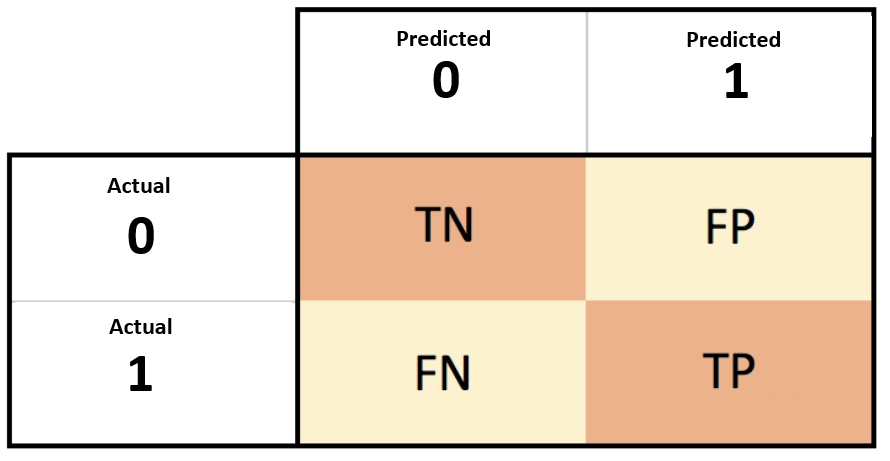

In [76]:
pred_y = (result.predict(train_x_rfe) >= 0.5).astype(int)

In [77]:
print(classification_report(train_y, pred_y))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27937
           1       0.67      0.33      0.45      3710

    accuracy                           0.90     31647
   macro avg       0.80      0.66      0.70     31647
weighted avg       0.89      0.90      0.89     31647



In [78]:
accuracy_score(train_y, pred_y)

0.9028975890289759

In [79]:
precision_score(train_y, pred_y)

0.6739486619333698

In [80]:
recall_score(train_y, pred_y)

0.3326145552560647

In [81]:
f1_score(train_y, pred_y)

0.4454069662515791

In [82]:
def plot_ConfusionMatrix_metrics(conf_mat, test_y, pred_y, figsize = None, class_names = None, hide_spines = False, 
                                 hide_ticks = False, title = ''): 
    '''
    conf_mat: Output of the confusion_matrix method
    test_y: The true values
    pred_y: The predicted values
    figsize: The size of confusion matrix that needs to be displayed
    class_names: Axes titles
    hide_splines: Option to remove splines. Default False
    hide_ticks: OPtion to hide ticks. Default False
    title: Title of the graph
    '''
    if figsize is None:
        figsize = (len(conf_mat)*5, len(conf_mat)*5)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    matshow = ax.matshow(conf_mat)
    
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            cell_text = ''
            cell_text += format(conf_mat[i, j], '.0f')
            ax.text(x=j,
                        y=i,
                        s=cell_text,
                        va='center',
                        ha='center',
                        fontsize = 20,
                        color="white" if [i, j] != [0, 0]
                        else "black")

    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
    ax.xaxis.set_ticks_position('top')
    
    ax.set_xticklabels(class_names, fontsize = 17)
    ax.set_yticklabels(class_names, fontsize = 17)
    ax.xaxis.set_label_coords(0.5, 1.15)
    
    plt.title(title, fontsize = 20, y = 1.2)
    plt.xlabel('Predicted', fontsize = 15)
    plt.ylabel('Actual', fontsize = 15)
    
    ax.text(2.5, 0.2, 'Accuracy %:' + str(round(accuracy_score(test_y, pred_y) * 100, 2)), fontsize = 17)
    ax.text(1.8, 0.4, 'Precision %: ' + str(round(precision_score(test_y, pred_y) *100, 2)), fontsize = 17)
    ax.text(3.4, 0.4, 'Sensitivity: ' + str(round(conf_mat[1][1] / (conf_mat[1][0] + conf_mat[1][1]), 2)), fontsize = 17)
    ax.text(1.8, 0.7, 'Specificity: ' + str(round(conf_mat[1][1] / (conf_mat[0][1] + conf_mat[1][1]), 2)), fontsize = 17)
    ax.text(3.4, 0.7, 'F1 Score: ' + str(round(f1_score(test_y, pred_y), 2)), fontsize = 17)
    ax.text(2.725, 0.55, 'AUC: ' + str(round(roc_auc_score(test_y, pred_y), 2)), fontsize = 17)
    
    plt.tight_layout()

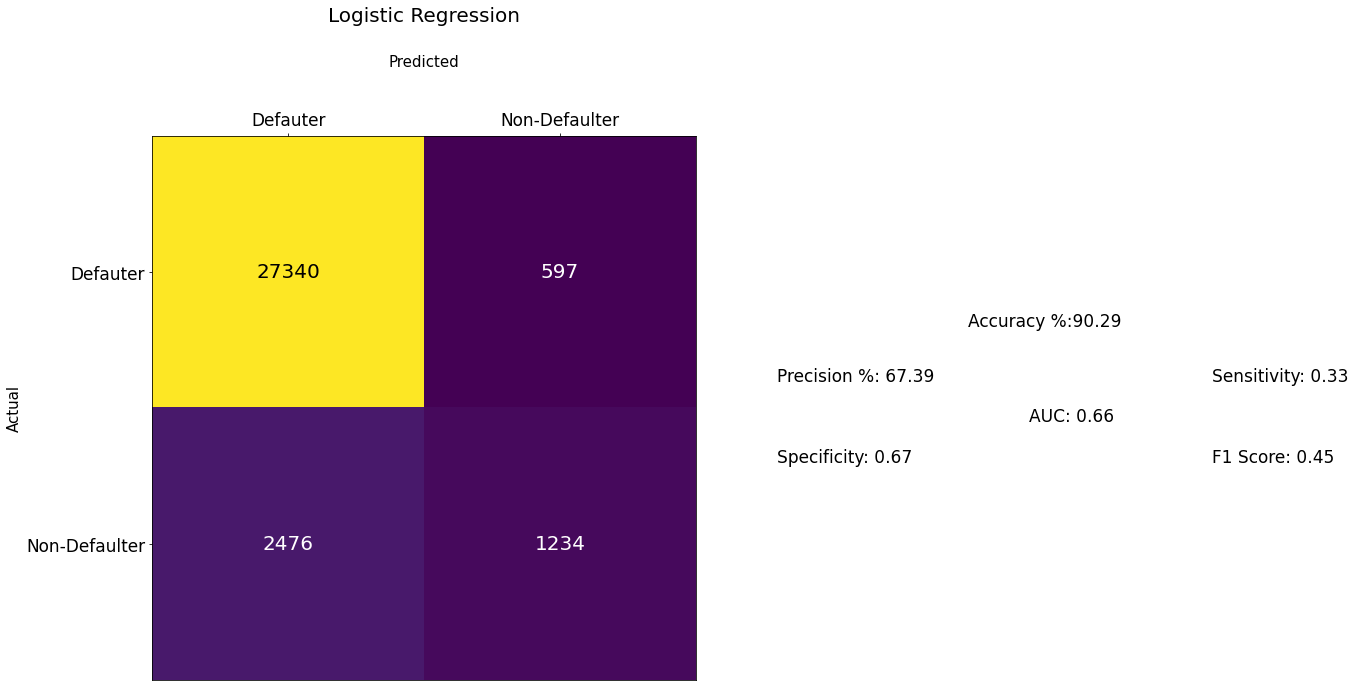

In [83]:
plot_ConfusionMatrix_metrics(
    confusion_matrix(train_y, (result.predict(train_x_rfe) >= 0.5).astype(int)), \
train_y, (result.predict(train_x_rfe) >= 0.5).astype(int), 
class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Logistic Regression')

> According to the use case, the False Negatives needs to be handled better as it degrades customer experience where the model's performance needs improvement

## Random Forest

In [84]:
rm = RandomForestClassifier(50, max_depth = 20)

In [85]:
rm.fit(train_x_rfe.drop('const', axis = 1), train_y)

RandomForestClassifier(max_depth=20, n_estimators=50)

In [86]:
pred_y = rm.predict(train_x_rfe.drop('const', axis = 1))

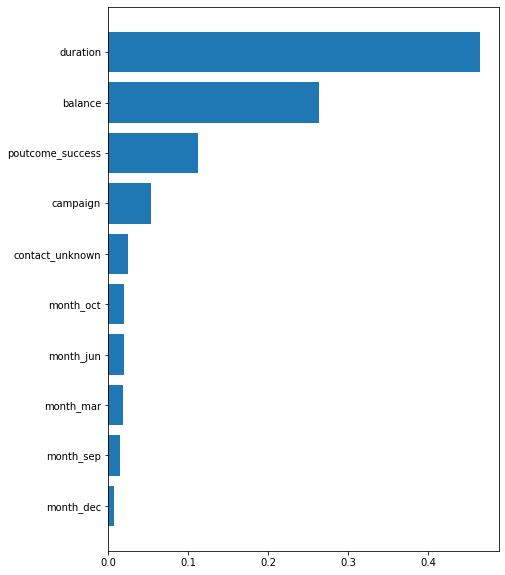

In [87]:
importance = rm.feature_importances_

# Plot feature importance

plt.figure(figsize = (7, 10))

temp = dict(zip(train_x_rfe.drop('const', axis = 1).columns, importance))
temp = sorted(temp, key = temp.get)
plt.barh(temp, sorted(importance))

plt.show()

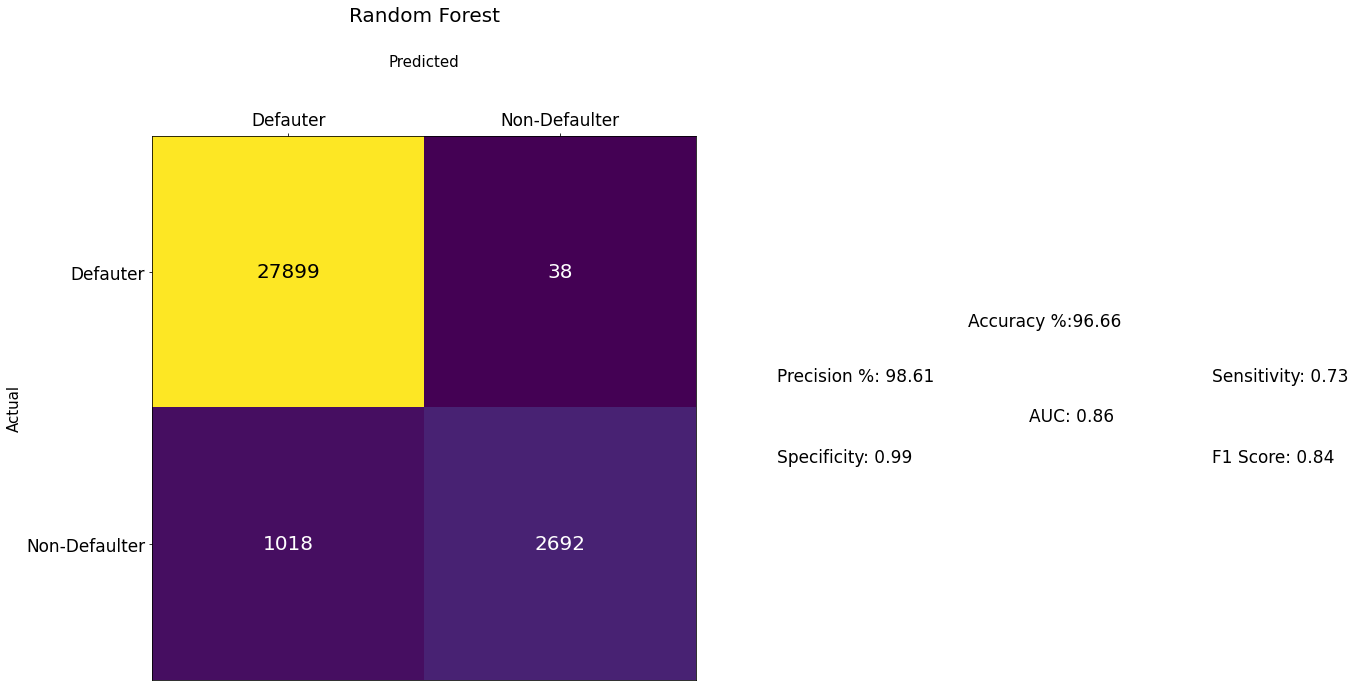

In [88]:
plot_ConfusionMatrix_metrics(confusion_matrix(train_y, pred_y), train_y, pred_y, 
                             class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Random Forest')

In [89]:
accuracy_score(train_y, pred_y)

0.9666319082377477

In [90]:
precision_score(train_y, pred_y)

0.9860805860805861

In [91]:
recall_score(train_y, pred_y)

0.7256064690026954

In [92]:
f1_score(train_y, pred_y)

0.836024844720497

> The model's accuracy and False Negative rate is really good, but this can be due to overfitting

#### As seen Random Forest performs better when tested against train data, let's have a look on test data

In [93]:
test_x = sm.add_constant(test_x)

In [94]:
# Testing how well model is performing on ---train data--- itself 

result.predict(test_x[train_x_rfe.columns])

14789    0.052025
8968     0.033167
34685    0.032213
2369     0.011292
36561    0.838257
           ...   
19848    0.079667
27091    0.410732
30831    0.017409
9125     0.021001
9471     0.036497
Length: 13564, dtype: float64

In [95]:
# Confusion matrix

result.pred_table()

array([[27340.,   597.],
       [ 2476.,  1234.]])

In [96]:
pred_y = (result.predict(test_x[train_x_rfe.columns]) >= 0.5).astype(int)

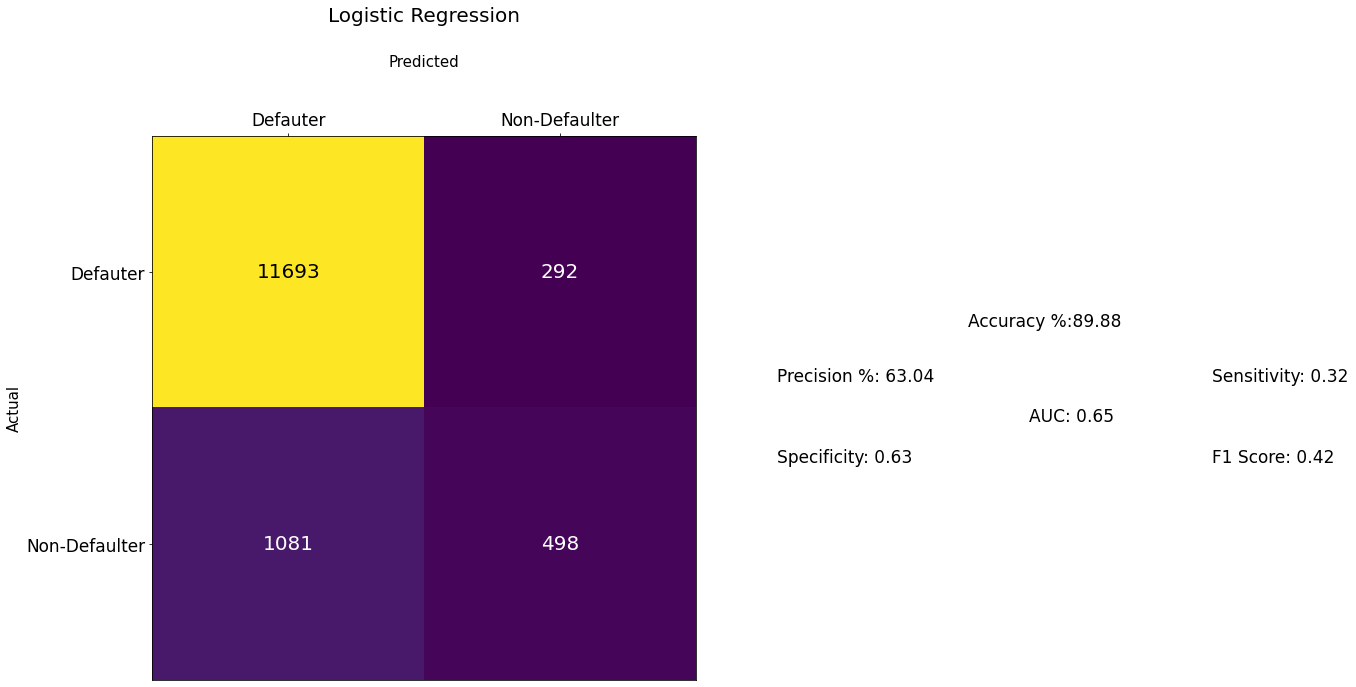

In [97]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, 
                             class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Logistic Regression')

In [98]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.92      0.98      0.94     11985
           1       0.63      0.32      0.42      1579

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.68     13564
weighted avg       0.88      0.90      0.88     13564



In [99]:
accuracy_score(test_y, pred_y)

0.8987761722205839

In [100]:
precision_score(test_y, pred_y)

0.6303797468354431

In [101]:
recall_score(test_y, pred_y)

0.31538948701709946

In [102]:
f1_score(test_y, pred_y)

0.42043056141831997

In [103]:
pred_y = rm.predict(test_x[temp])

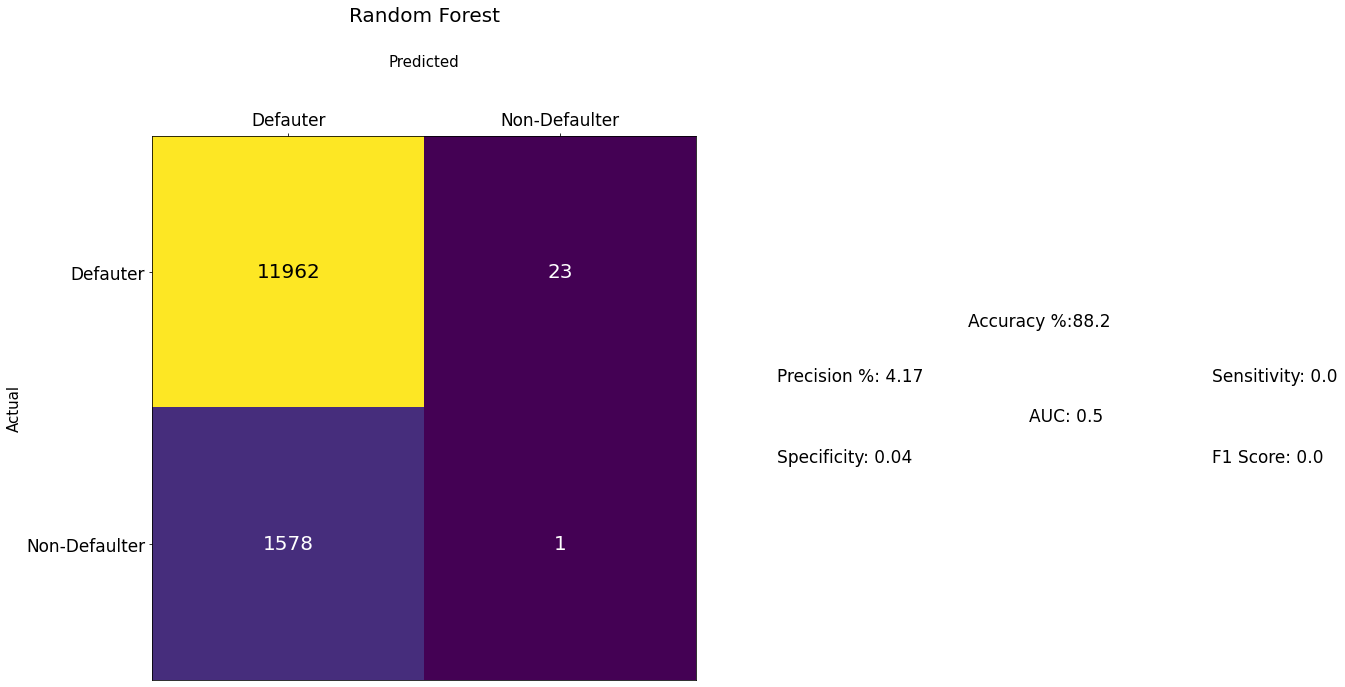

In [104]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, 
                             class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Random Forest')

In [105]:
accuracy_score(test_y, pred_y)

0.8819669713948688

In [106]:
precision_score(test_y, pred_y)

0.041666666666666664

In [107]:
recall_score(test_y, pred_y)

0.0006333122229259025

In [108]:
f1_score(test_y, pred_y)

0.0012476606363069245

In [109]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [110]:
df_mod = sm.add_constant(df)

scores = cross_val_score(rm, df_mod[train_x_rfe.columns], df['response'], cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.89623142 0.61871267 0.89170537 0.88095554 0.86954214 0.74917054]


In [111]:
skf = StratifiedKFold(shuffle=True, n_splits=5)
cv_results_skfold = cross_val_score(rm, df_mod[train_x_rfe.columns], df['response'], cv=skf, scoring='accuracy')

In [112]:
print(cv_results_skfold)

[0.89970143 0.90157045 0.89902676 0.89648308 0.89891617]


In [113]:
print(cv_results_skfold.mean())

0.8991395774955426


In [114]:
skf = StratifiedKFold(shuffle=True, n_splits=5)
cv_results_skfold = cross_val_score(rm, df_mod[train_x_rfe.columns], df['response'], cv=skf, scoring='recall')

In [115]:
print(cv_results_skfold)

[0.38563327 0.43614002 0.41115312 0.41965974 0.3979206 ]


In [116]:
print(cv_results_skfold.mean())

0.41010134972002293


In [117]:
skf = StratifiedKFold(shuffle=True, n_splits=5)
cv_results_skfold = cross_val_score(rm, df_mod[train_x_rfe.columns], df['response'], cv=skf, scoring='precision')

In [118]:
print(cv_results_skfold)

[0.62680115 0.58068966 0.60875513 0.58873239 0.60351827]


In [119]:
print(cv_results_skfold.mean())

0.6016993200329916


In [120]:
skf = StratifiedKFold(shuffle=True, n_splits=5)
cv_results_skfold = cross_val_score(rm, df_mod[train_x_rfe.columns], df['response'], cv=skf, scoring='f1')

In [121]:
print(cv_results_skfold)

[0.49801475 0.49718785 0.47282913 0.47570621 0.48639456]


In [122]:
print(cv_results_skfold.mean())

0.4860265006545905


|  | Logisitc Regression | Random Forest |
| --- | --- | --- |
| Accuracy | 89.88 % | 89.78% |
| Sensitivity | 0.32 | 0.41 |

> __The accuracy of logistic regression is better compared to random forest but sensitivity of random forest is better.__

> Both the models tend to give the importance to the same set of variables